# Final Project
## Thi Trinh - 20461296

This is used to describe the test and how data is used to train machine to udnerstand sign language

### Task 1. Loading the data

In [1]:
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import numba


In [2]:
data_train = pd.read_csv('sign_mnist_train.csv')
data_test = pd.read_csv('sign_mnist_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'sign_mnist_train.csv'

In [12]:
print(data_train.shape)
data_train

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [13]:
print(data_test.shape)
data_test

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


Putting labels into X and y training variables

In [14]:
y_train = data_train['label'].to_numpy()
X_train = data_train.drop(columns = ['label'], axis =1 )

Putting labels into X and y testing variables

In [15]:
y_test = data_test['label'].to_numpy()
X_test = data_test.drop(columns = ['label'],axis = 1)

Visualizing number of digits classes 

Text(0.5, 1.0, 'Distribution classes')

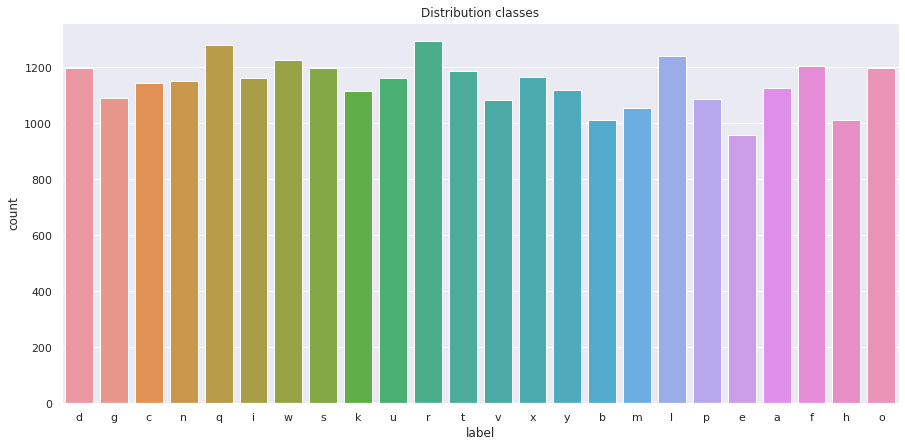

In [16]:
plt.figure(figsize = (15,7))
alpha_dict = {idx:letter for idx, letter in enumerate(string.ascii_lowercase)}
alpha_labels = data_train.label.apply(lambda x: alpha_dict[x])
sns.countplot(x=alpha_labels)
plt.title('Distribution classes')

Plotting out some samples to help visualing it easier

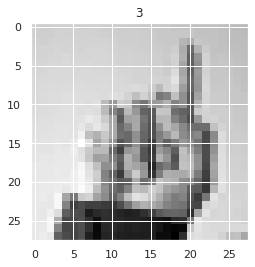

In [17]:
img = X_train.iloc[9].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(data_train.iloc[9,0])
plt.show()

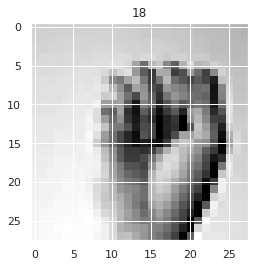

In [18]:
img = X_train.iloc[20].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(data_train.iloc[20,0])
plt.show()

### Task 2. Logistic Regression

In [19]:

class myLogisticRegression():
    """ Logistic Regression classifier -- this also works for the multiclass case.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    """
    
    def __init__(self, learning_rate=.1, opt_method = 'SGD', num_epochs = 50, size_batch = 20):
        
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate
        self.opt_method = opt_method
        self.num_epochs = num_epochs
        self.size_batch = size_batch
        

    def fit(self, data, y, n_iterations = 1000):
        """ 
        Determine the optimal parameter W for the input data x,y 
        """
        self.K = max(y)+1 
        ones = np.ones((data.shape[0],1))  
        X = np.concatenate((ones, data), axis = 1)
        eta = self.learning_rate
        
        W  = np.zeros((np.shape(X)[1],max(y)+1)) 
        if self.opt_method == 'GD':
            for k in range(n_iterations):
                dW = self.loss_gradient(W,X,y) 
                W = W - eta * dW 
                # this step is for inspection purposes
                if k % 500 == 0: 
                    print("loss after", k+1, "iterations is: ", self.loss(W,X,y))
        
        if self.opt_method == 'SGD':
            N = X.shape[0]
            num_epochs = self.num_epochs
            size_batch = self.size_batch
            num_iter = 0
            for e in range(num_epochs):
                shuffle_index = np.random.permutation(N) # in each epoch, we first reshuffle the data to create "randomness"
                for m in range(0,N,size_batch):   # m is the starting index of mini-batch
                    i = shuffle_index[m:m+size_batch] # index of samples in the mini-batch
                    dW = self.loss_gradient(W,X[i,:],y[i]) # only use the data in mini-batch to compute gradient. Note the average is taken in the loss_gradient function
                    W = W - eta * dW 
                
                    if e % 1 == 0 and num_iter % 50 ==0: # print loss during the training process
                        print("loss after", e+1, "epochs and ", num_iter+1, "iterations is: ", self.loss(W,X,y))
        
                    num_iter = num_iter +1  # number of total iterations
            
        self.coeff = W
        
    def predict(self, data):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        W = self.coeff # the estimated W
        y_pred = np.argmax(self.sigma(X,W), axis =1) # the category with largest probability
        return y_pred
    
    def score(self, data, y_true):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigma(self,X,W): #return the softmax probability
        s = np.exp(np.matmul(X,W))
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total
    
    def loss(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value+1e-10)[:,k] * (y == k) # avoid nan issues
        return -np.mean(loss_vector)
                          
    def loss_gradient(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        dLdW = np.zeros((X.shape[1],K))
        for k in range(K):
            dLdWk =(f_value[:,k] - (y==k)).reshape(-1,1)*X # Numpy broadcasting
            dLdW[:,k] = np.mean(dLdWk, axis=0)   # RHS is 1D Numpy array -- so you can safely put it in the k-th column of 2D array dLdW
        return dLdW

In [20]:
lg_sgd = myLogisticRegression(learning_rate=1e-6, opt_method = 'SGD', num_epochs = 15, size_batch = 40)

In [21]:
%%time
lg_sgd.fit(X_train,y_train)

loss after 1 epochs and  1 iterations is:  3.355199083014902
loss after 1 epochs and  51 iterations is:  3.0286202289083333
loss after 1 epochs and  101 iterations is:  2.865503511561834
loss after 1 epochs and  151 iterations is:  2.5264980390881617
loss after 1 epochs and  201 iterations is:  2.7694859411317676
loss after 1 epochs and  251 iterations is:  2.376101419081038
loss after 1 epochs and  301 iterations is:  2.1649799322755343
loss after 1 epochs and  351 iterations is:  2.1091637361964817
loss after 1 epochs and  401 iterations is:  1.9313922286771354
loss after 1 epochs and  451 iterations is:  1.878022177335755
loss after 1 epochs and  501 iterations is:  1.760031692864232
loss after 1 epochs and  551 iterations is:  1.8666053310287287
loss after 1 epochs and  601 iterations is:  1.6611540574052794
loss after 1 epochs and  651 iterations is:  1.6702502207515235
loss after 2 epochs and  701 iterations is:  1.7176103046330584
loss after 2 epochs and  751 iterations is:  1.5

In [22]:
lg_sgd.score(X_test,y_test)

0.649888455103179

Description on using SGD instead of GD to boost the process of fitting data + evaluation on the score 

### Task 5: Try other python package in Machine Learning

Setting up environment in Pycaret

In [42]:
pip install pycaret

     |████████████████████████████████| 261 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.2 MB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 24.2 MB 503 kB/s  eta 0:00:01
     |████████████████████████████████| 102 kB 56.0 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 44.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 53.2 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 2.7 MB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 48.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 49.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 40.0 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl s

In [45]:
pip uninstall lightgbm -y

Found existing installation: lightgbm 3.1.1
Uninstalling lightgbm-3.1.1:
  Successfully uninstalled lightgbm-3.1.1
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

/opt/conda/lib/python3.7/site-packages/pip/_internal/commands/install.py:230: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 1.5 MB 1.3 MB/s eta 0:00:01     |███▎                            | 153 kB 1.3 MB/s eta 0:00:02
Skipping wheel build for lightgbm, due to binaries being disabled for it.
    Running setup.py install for lightgbm ... done
Note: you may need to restart the kernel to use updated packages.


In [47]:
from pycaret.classification import *
exp_clf101 = setup(data = data_train, target = 'label',use_gpu = True )

,Description,Value
0,session_id,7229
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(27455, 785)"
5,Missing Values,False
6,Numeric Features,784
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

Comparing all models

In [49]:
best = compare_models(include = ['lr','dt','knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9928,0.9998,0.9927,0.9929,0.9928,0.9925,0.9925,0.4630
dt,Decision Tree Classifier,0.8596,0.9267,0.8595,0.8612,0.8596,0.8535,0.8535,10.2890
lr,Logistic Regression,0.5411,0.6751,0.5416,0.5298,0.5248,0.5209,0.5225,0.7310


Compare models

In [50]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,cuml.linear_model.logistic_regression.Logistic...,True
knn,K Neighbors Classifier,cuml.neighbors.kneighbors_classifier.KNeighbor...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,cuml.linear_model.mbsgd_classifier.MBSGDClassi...,True
rbfsvm,SVM - Radial Kernel,pycaret.internal.cuml_wrappers.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,cuml.linear_model.ridge.Ridge,True


In [52]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9943,1.0000,0.9941,0.9944,0.9943,0.9940,0.9940
1,0.9938,1.0000,0.9935,0.9939,0.9937,0.9935,0.9935
2,0.9891,0.9997,0.9892,0.9892,0.9891,0.9886,0.9886
3,0.9927,0.9997,0.9926,0.9928,0.9927,0.9924,0.9924
4,0.9943,1.0000,0.9944,0.9944,0.9943,0.9940,0.9940
5,0.9927,0.9997,0.9926,0.9929,0.9927,0.9924,0.9924
6,0.9886,0.9989,0.9884,0.9887,0.9886,0.9881,0.9881
7,0.9932,1.0000,0.9931,0.9934,0.9932,0.9929,0.9929
8,0.9948,1.0000,0.9949,0.9948,0.9948,0.9946,0.9946
9,0.9943,1.0000,0.9942,0.9943,0.9943,0.9940,0.9940


In [55]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9932,1.0000,0.9931,0.9934,0.9932,0.9929,0.9929
1,0.9938,1.0000,0.9937,0.9938,0.9937,0.9935,0.9935
2,0.9865,1.0000,0.9866,0.9867,0.9865,0.9859,0.9859
3,0.9901,0.9997,0.9900,0.9902,0.9901,0.9897,0.9897
4,0.9906,1.0000,0.9907,0.9907,0.9906,0.9902,0.9902
5,0.9922,0.9997,0.9919,0.9924,0.9922,0.9919,0.9919
6,0.9854,0.9989,0.9854,0.9856,0.9854,0.9848,0.9848
7,0.9891,1.0000,0.9891,0.9893,0.9891,0.9886,0.9886
8,0.9896,1.0000,0.9898,0.9897,0.9896,0.9891,0.9891
9,0.9927,1.0000,0.9926,0.9928,0.9927,0.9924,0.9924


In [56]:
print(tuned_knn)

KNeighborsClassifier(weights='uniform')


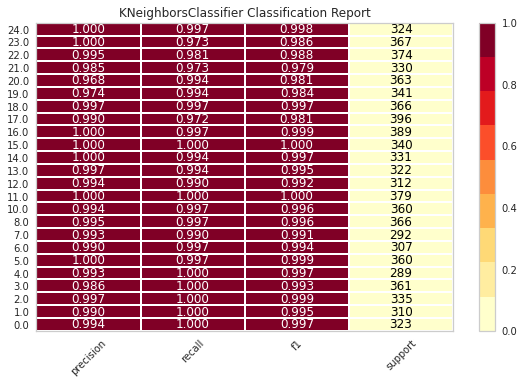

In [57]:
plot_model(tuned_knn, plot = 'class_report')

In [58]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [59]:
final_knn = finalize_model(tuned_knn)

In [60]:
print(final_knn)

KNeighborsClassifier(weights='uniform')


In [62]:
predict_model(knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9944,0.9999,0.9945,0.9945,0.9944,0.9942,0.9942


IndexError: index 24 is out of bounds for axis 0 with size 24

In [64]:

unseen_predictions = predict_model(knn, data=data_test)
unseen_predictions.head()

IndexError: index 24 is out of bounds for axis 0 with size 24

### Task 7

In [ ]:
from numba import jit
class myLogisticRegression():
    """ Logistic Regression classifier -- this also works for the multiclass case.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    """
    
    def __init__(self, learning_rate=.1, opt_method = 'SGD', num_epochs = 50, size_batch = 20):
        
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate
        self.opt_method = opt_method
        self.num_epochs = num_epochs
        self.size_batch = size_batch
        

    @jit
    def fit(self, data, y, n_iterations = 1000):
        """ 
        Determine the optimal parameter W for the input data x,y 
        """
        self.K = max(y)+1 
        ones = np.ones((data.shape[0],1))  
        X = np.concatenate((ones, data), axis = 1)
        eta = self.learning_rate
        
        W  = np.zeros((np.shape(X)[1],max(y)+1)) 
        if self.opt_method == 'GD':
            for k in range(n_iterations):
                dW = self.loss_gradient(W,X,y) 
                W = W - eta * dW 
                # this step is for inspection purposes
                if k % 500 == 0: 
                    print("loss after", k+1, "iterations is: ", self.loss(W,X,y))
        
        if self.opt_method == 'SGD':
            N = X.shape[0]
            num_epochs = self.num_epochs
            size_batch = self.size_batch
            num_iter = 0
            for e in range(num_epochs):
                shuffle_index = np.random.permutation(N) # in each epoch, we first reshuffle the data to create "randomness"
                for m in range(0,N,size_batch):   # m is the starting index of mini-batch
                    i = shuffle_index[m:m+size_batch] # index of samples in the mini-batch
                    dW = self.loss_gradient(W,X[i,:],y[i]) # only use the data in mini-batch to compute gradient. Note the average is taken in the loss_gradient function
                    W = W - eta * dW 
                
                    if e % 1 == 0 and num_iter % 50 ==0: # print loss during the training process
                        print("loss after", e+1, "epochs and ", num_iter+1, "iterations is: ", self.loss(W,X,y))
        
                    num_iter = num_iter +1  # number of total iterations
            
        self.coeff = W
        
    def predict(self, data):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        W = self.coeff # the estimated W
        y_pred = np.argmax(self.sigma(X,W), axis =1) # the category with largest probability
        return y_pred
    
    def score(self, data, y_true):
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigma(self,X,W): #return the softmax probability
        s = np.exp(np.matmul(X,W))
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total
    
    def loss(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value+1e-10)[:,k] * (y == k) # avoid nan issues
        return -np.mean(loss_vector)
                          
    def loss_gradient(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        dLdW = np.zeros((X.shape[1],K))
        for k in range(K):
            dLdWk =(f_value[:,k] - (y==k)).reshape(-1,1)*X # Numpy broadcasting
            dLdW[:,k] = np.mean(dLdWk, axis=0)   # RHS is 1D Numpy array -- so you can safely put it in the k-th column of 2D array dLdW
        return dLdW

In [ ]:
lg_sgd = myLogisticRegression(learning_rate=1e-6, opt_method = 'SGD', num_epochs = 15, size_batch = 40)

In [ ]:
%%time
lg_sgd.fit(X_train,y_train)